活性化関数がない場合について検証

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

In [ ]:
transform=transforms.Compose([
    transforms.ToTensor()
])
train_datase=datasets.MNIST(root="./data",train=True,download=True,transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 391765399.38it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 115477305.84it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 158048617.32it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21672956.51it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
num_batches=100

In [ ]:
train_dataloader=DataLoader(train_datase,batch_size=num_batches,shuffle=True)

In [ ]:
train_iter=iter(train_dataloader)

In [ ]:
imgs,labels=next(train_iter)

In [ ]:
imgs.size()

torch.Size([100, 1, 28, 28])

In [ ]:
labels

tensor([6, 6, 6, 3, 4, 1, 7, 1, 9, 7, 1, 2, 3, 3, 7, 5, 1, 1, 2, 4, 7, 5, 0, 0,
        1, 1, 4, 3, 7, 8, 0, 6, 4, 7, 2, 2, 8, 8, 2, 7, 5, 0, 8, 4, 0, 3, 5, 4,
        1, 4, 4, 1, 1, 6, 9, 1, 0, 8, 1, 6, 9, 3, 8, 1, 6, 7, 5, 9, 5, 8, 0, 8,
        9, 9, 1, 2, 9, 3, 6, 2, 2, 0, 2, 0, 6, 9, 0, 0, 9, 7, 6, 1, 4, 3, 5, 3,
        3, 9, 6, 4])

In [ ]:
img=imgs[0]

In [ ]:
img_permute=img.permute(1,2,0)#順番の変更

<Axes: >

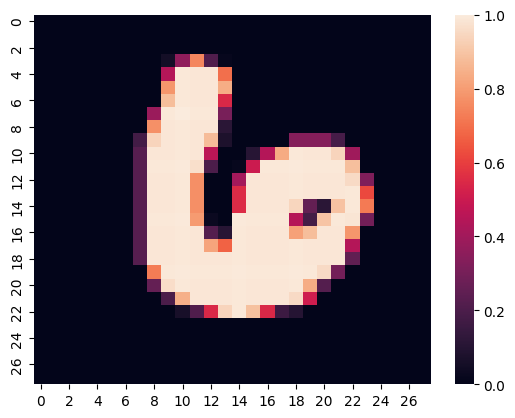

In [ ]:
sns.heatmap(img_permute.numpy()[:,:,0])#2次元配列に変更

In [ ]:
labels[0]

tensor(6)

In [ ]:
#モデルの作成
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(28 * 28, 400),
            #nn.ReLU(inplace=True),
            nn.Linear(400, 200),
            #nn.ReLU(inplace=True),
            nn.Linear(200, 100),
            #nn.ReLU(inplace=True),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        output = self.classifier(x)
        return output

In [ ]:
model=MLP()

In [ ]:
model.to(device)

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [ ]:
criterion=nn.CrossEntropyLoss()#損失関数、他クラス分類なのでCrossEntropyLoss関数を使用する
optimizer=optim.Adam(model.parameters(),lr=0.001)#モデルのパラメーターの値を渡し、ラーニングレートを設定する

In [ ]:
#学習
num_epochs=15
losses=[]#損失
accs=[]#精度
for epoch in range(num_epochs):
    running_loss=0.0
    running_acc=0.0
    for imgs,labels in train_dataloader:#ミニバッチのル－プ
        imgs=imgs.view(num_batches,-1)#画像データを1次元ベクトルに変形
        imgs=imgs.to(device)#GPU上にデータを送る
        labels=labels.to(device)#GPU上にデータを送る
        optimizer.zero_grad()#optimizerの初期化
        output=model(imgs)
        loss=criterion(output,labels)
        running_loss+=loss.item()#損失の計算
        pred=torch.argmax(output,dim=1)#分類方向の最大値を代入(予測値)
        running_acc+=torch.mean(pred.eq(labels).float())#labelsと等しいかどうか判断、平均値をとるためfloat型に変換すること
        loss.backward()#誤差逆伝播
        optimizer.step()#重みの更新
    running_loss/=len(train_dataloader)
    running_acc/=len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {},loss: {},acc: {},".format(epoch,running_loss,running_acc))


epoch: 0,loss: 0.39569672365983327,acc: 0.8876343965530396,
epoch: 1,loss: 0.31997941492746274,acc: 0.908067524433136,
epoch: 2,loss: 0.311447904681166,acc: 0.9123342037200928,
epoch: 3,loss: 0.3005036370207866,acc: 0.9152006506919861,
epoch: 4,loss: 0.2972149011368553,acc: 0.9156010150909424,
epoch: 5,loss: 0.2933324701959888,acc: 0.9172005653381348,
epoch: 6,loss: 0.28958124125997226,acc: 0.918550968170166,
epoch: 7,loss: 0.28329054462412995,acc: 0.9201839566230774,
epoch: 8,loss: 0.2817927098025878,acc: 0.9205843210220337,
epoch: 9,loss: 0.27751257025947174,acc: 0.9220682978630066,
epoch: 10,loss: 0.27645518161356447,acc: 0.9221678972244263,
epoch: 11,loss: 0.27550775777548553,acc: 0.9228512048721313,
epoch: 12,loss: 0.27229106970131395,acc: 0.9234674572944641,
epoch: 13,loss: 0.2705715252831578,acc: 0.9235010743141174,
epoch: 14,loss: 0.2692926421016455,acc: 0.9238345623016357,


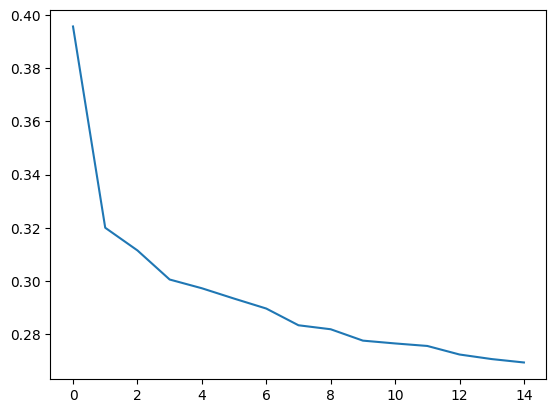

In [ ]:
plt.plot(losses)

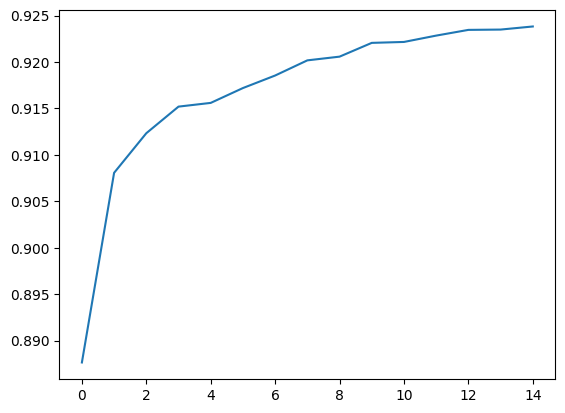

In [ ]:
plt.plot([accs_.cpu() for accs_ in accs], label="train acc")

In [ ]:
train_iter=iter(train_dataloader)

In [ ]:
imgs, labels = next(train_iter)

In [ ]:
labels

tensor([6, 2, 9, 8, 5, 8, 3, 8, 0, 3, 4, 9, 9, 3, 0, 7, 1, 7, 3, 4, 7, 6, 1, 1,
        0, 6, 0, 8, 2, 4, 4, 5, 5, 9, 4, 6, 2, 8, 3, 0, 2, 2, 7, 0, 2, 7, 7, 0,
        1, 0, 6, 5, 9, 3, 3, 4, 9, 7, 2, 2, 2, 5, 6, 7, 3, 8, 5, 5, 7, 8, 6, 1,
        1, 0, 3, 6, 4, 7, 8, 4, 2, 2, 1, 8, 2, 3, 1, 4, 8, 2, 3, 2, 6, 7, 0, 1,
        4, 7, 1, 9])

In [ ]:
imgs_gpu=imgs.view(100,-1).to(device)
output=model(imgs_gpu)

In [ ]:
pred=torch.argmax(output,dim=1)

In [ ]:
pred

tensor([6, 2, 9, 8, 5, 8, 3, 8, 0, 3, 4, 9, 9, 3, 0, 7, 1, 7, 3, 4, 7, 6, 1, 1,
        0, 6, 0, 3, 8, 4, 9, 5, 5, 9, 4, 6, 2, 8, 3, 0, 2, 2, 7, 0, 2, 9, 7, 0,
        1, 0, 6, 2, 9, 3, 3, 4, 9, 7, 2, 2, 2, 2, 6, 7, 3, 8, 5, 5, 9, 8, 6, 1,
        1, 0, 3, 6, 4, 7, 8, 4, 2, 2, 1, 8, 2, 3, 1, 4, 8, 2, 3, 2, 6, 7, 0, 1,
        6, 7, 1, 9], device='cuda:0')

In [ ]:
params=model.state_dict()#モデルの重みやバイアスを抜き出す

In [ ]:
torch.save(params,"model.prm")#保存

In [ ]:
!ls

data  model.prm  sample_data


In [ ]:
param_load=torch.load("model.prm")#読込み

In [ ]:
model.load_state_dict(param_load)

<All keys matched successfully>